In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv("daily_births.csv",index_col=0)

In [3]:
# Xem thông tin của DataFrame
print(data.head())

          Births
Date            
1/1/1959      35
1/2/1959      32
1/3/1959      30
1/4/1959      31
1/5/1959      44


In [4]:
data.isna().sum()

Births    0
dtype: int64

In [5]:
data.index = pd.to_datetime(data.index)

In [6]:
data

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [7]:
data.index.freq = 'D'

<AxesSubplot: xlabel='Date'>

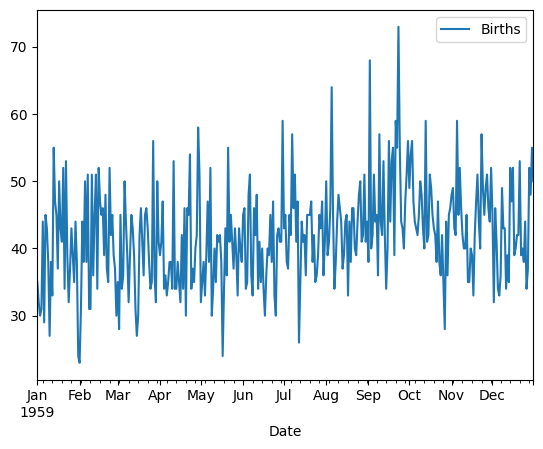

In [8]:
data.plot()

In [9]:
#decompose

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
decomposition=seasonal_decompose(x=data,model='multiplicative')


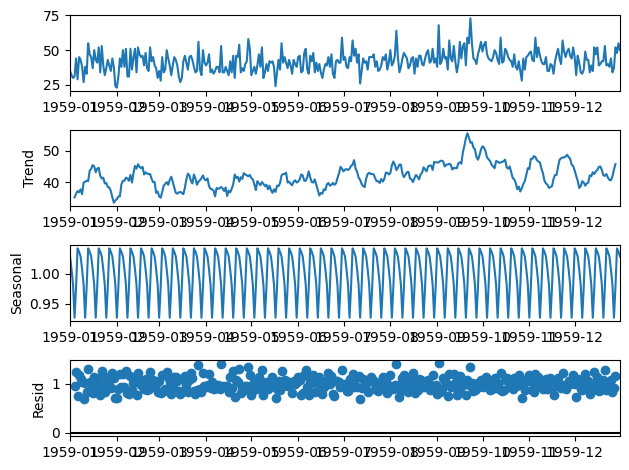

In [12]:
decomposition.plot()
plt.show()

In [13]:
#nhận xét
# trend: số trẻ em sinh ra trong 1 năm ko đều, và có xu hướng tăng dần vào tầm tháng 9, tháng 10 
# seasonal: có 4 chu kì trong 1 tháng,  thường thì các ca sinh có trong giữa tháng, đầu tháng và cuối tháng tỉ lệ thâp

In [14]:
from pmdarima.arima import auto_arima

In [15]:
model = auto_arima(data, start_p=2, start_q=2,
                      test='adf',
                      max_p=5, max_q=5,
                      m=12,             
                      d=1,          
                      seasonal=True,   
                      start_P=1, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=1.50 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2827.406, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2631.984, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.31 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2750.743, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=2584.333, Time=0.19 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.77 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.43 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=2660.446, Time=0.14 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=2564.537, Time=0.28 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=2615.462, Time=0.11 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=1.34 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.48 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=2545.693, Time=0.33 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=2597.0

In [16]:
#train test 

In [17]:
train = data.loc['1959-01-01':'1959-07-31']
test = data.loc["1959-08-01" : "1959-12-31"]

In [18]:
train

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-07-27,45
1959-07-28,43
1959-07-29,47


In [19]:
test

,Births
Date,
1959-08-01,50
1959-08-02,39
1959-08-03,41
1959-08-04,46
1959-08-05,64
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [20]:
test.shape

(153, 1)

In [21]:
model.fit(train)

ARIMA(order=(5, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [22]:
prediction = model.predict(n_periods=len(test))

In [23]:
prediction

1959-08-01    43.032788
1959-08-02    47.614141
1959-08-03    40.775050
1959-08-04    43.414103
1959-08-05    38.270035
                ...    
1959-12-27    31.127779
1959-12-28    32.229042
1959-12-29    37.408235
1959-12-30    38.289106
1959-12-31    37.503361
Freq: D, Length: 153, dtype: float64

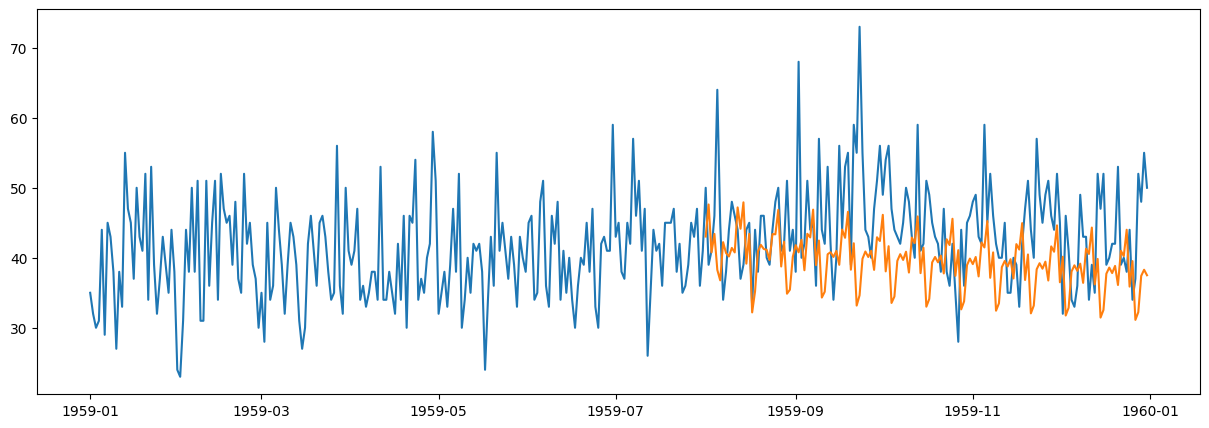

In [24]:
from matplotlib import pyplot as plt
prediction_series = pd.Series(prediction,index=test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(data)
ax.plot(prediction_series)

In [25]:
#predict ko khớp với thực tế lắm

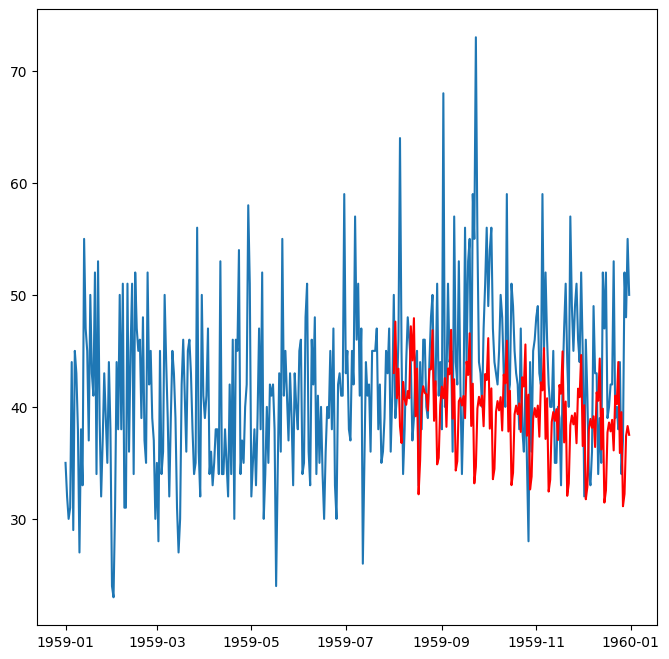

In [26]:
plt.figure(figsize=(8,8))
plt.plot(data,label='gt')
plt.plot(prediction_series,label='prediction',color='red')

In [27]:
prediction_new = model.predict(n_periods=len(test)+31)

In [28]:
prediction_new

1959-08-01    43.032788
1959-08-02    47.614141
1959-08-03    40.775050
1959-08-04    43.414103
1959-08-05    38.270035
                ...    
1960-01-27    40.053536
1960-01-28    39.293726
1960-01-29    43.063271
1960-01-30    34.940628
1960-01-31    38.585019
Freq: D, Length: 184, dtype: float64

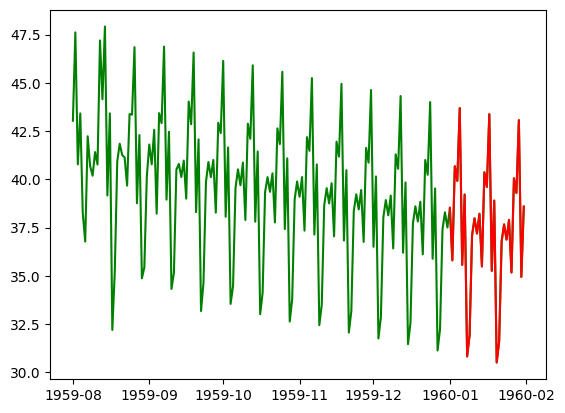

In [29]:
plt.plot(prediction_new,label='current pred',color='green')
plt.plot(prediction_new[len(test):],label='prediction for next 12 months',color='red')